# Hypergraph generation

# Hypergraph coloring

We assign additional value to each node (belonging to colors of types 0,1...k).

This can be done using "add_attr_meta" to the hypergraph nodes.


In [3]:
import sys
sys.path.append("..")

from hypergraphx.generation.scale_free import scale_free_hypergraph
from hypergraphx.linalg import *
from hypergraphx.representations.projections import bipartite_projection, clique_projection
from hypergraphx.generation.random import *
from hypergraphx.readwrite.save import save_hypergraph
from hypergraphx.readwrite.load import load_hypergraph
from hypergraphx.viz.draw_hypergraph import draw_hypergraph

In [2]:
!pip install hypergraphx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 3.3 MB/s eta 0:00:00


In [4]:
H = Hypergraph([(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3)])
print(H)

Hypergraph with 8 nodes and 5 edges.
Distribution of hyperedge sizes: {2: 3, 4: 1, 3: 1}


# Get weights of edges

In [7]:
H = Hypergraph([(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3)], weighted=True, weights=[1, 2, 3, 4, 5])

In [ ]:
H.get_edges()

[(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3)]

In [ ]:
H.get_weights()

[1, 2, 3, 4, 5]

In [ ]:
for edge in H:
    print(edge)

((1, 3), 1)
((1, 4), 2)
((1, 2), 3)
((5, 6, 7, 8), 4)
((1, 2, 3), 5)


In [ ]:
H.get_weight((1, 2, 3))

5

In [ ]:
H.get_weight((2, 3, 1))

5

In [ ]:
H.is_connected()

False

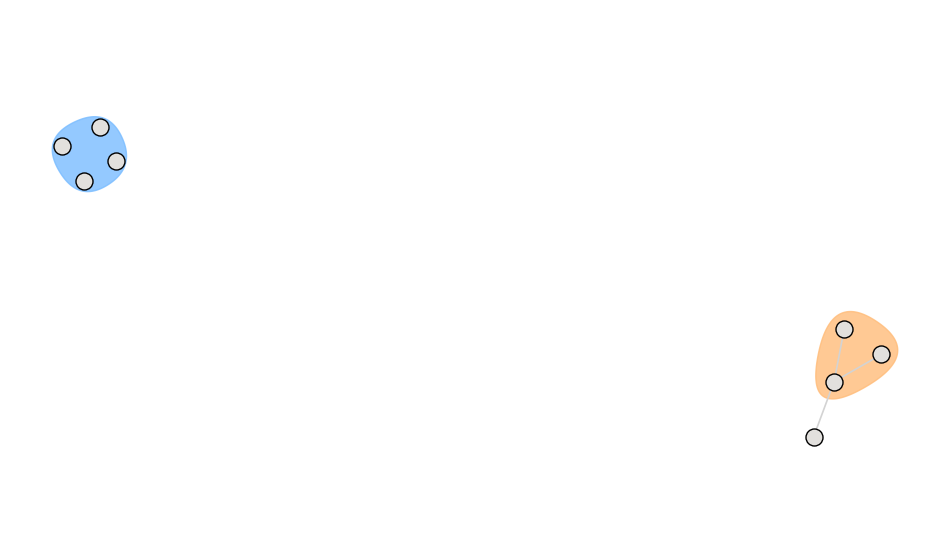

In [ ]:
draw_hypergraph(H)

In [8]:
H.add_edge((1,5), weight=10)

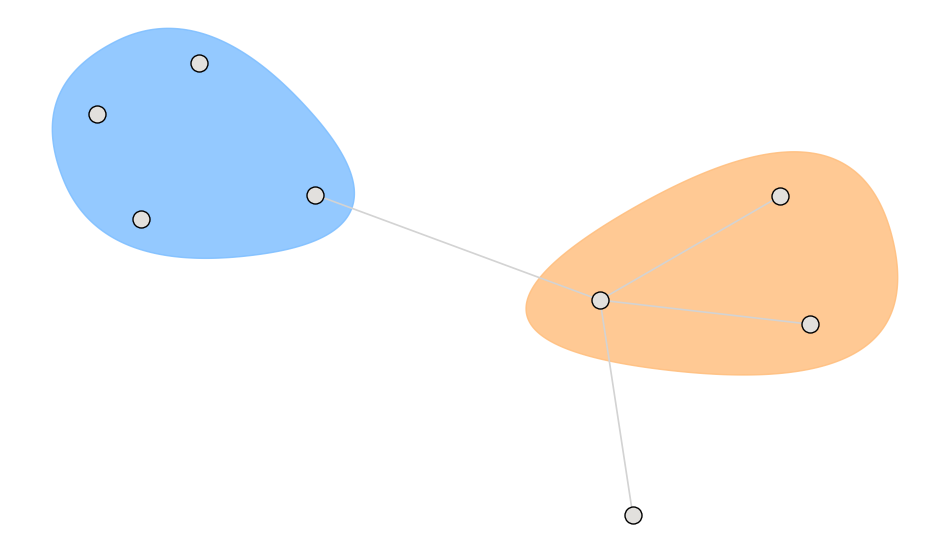

In [ ]:
draw_hypergraph(H)

In [ ]:
H.is_connected()

True

In [ ]:
H.is_uniform()

False

In [ ]:
print(H.check_edge((5, 6, 7, 8)))
H.remove_edge((5, 6, 7, 8))

True


In [ ]:
print(H.get_edges())
print(H.get_weights())
H.remove_edges([(1,2,3), (1,3)])

[(1, 3), (1, 4), (1, 2), (1, 2, 3), (1, 5)]
[1, 2, 3, 5, 10]


In [ ]:
print(H.get_edges())
print(H.is_uniform())

[(1, 4), (1, 2), (1, 5)]
True


In [ ]:
H.get_edges()

[(1, 4), (1, 2), (1, 5)]

In [ ]:
H.add_attr_meta(1, 'role', 'student')

# Adding colors as attributes of nodes

In [9]:
H.add_attr_meta(1,'color', '1')

H.add_attr_meta(2,'color', '2')

In [10]:
H.get_nodes(metadata=True)

[(1, {'type': 'node', 'name': 1, 'color': '1'}),
 (3, {'type': 'node', 'name': 3}),
 (4, {'type': 'node', 'name': 4}),
 (2, {'type': 'node', 'name': 2, 'color': '2'}),
 (5, {'type': 'node', 'name': 5}),
 (6, {'type': 'node', 'name': 6}),
 (7, {'type': 'node', 'name': 7}),
 (8, {'type': 'node', 'name': 8})]

In [ ]:
H.remove_node(1)

In [11]:
H.get_nodes(metadata=True)

[(1, {'type': 'node', 'name': 1, 'color': '1'}),
 (3, {'type': 'node', 'name': 3}),
 (4, {'type': 'node', 'name': 4}),
 (2, {'type': 'node', 'name': 2, 'color': '2'}),
 (5, {'type': 'node', 'name': 5}),
 (6, {'type': 'node', 'name': 6}),
 (7, {'type': 'node', 'name': 7}),
 (8, {'type': 'node', 'name': 8})]


# Motifs
From Motifs tutorial GHX

Motifs are small recurring patterns of subgraphs that are overrepresented in a network. Motif analysis has established itself as a fundamental tool in network science to describe networked systems at their microscale, identifying their structural and functional building blocks.

We provide an implementation for higher-order motif analysis, extracting overabundant subgraphs of nodes connected by higher-order interactions, as originally defined in Lotito, Q.F., Musciotto, F., Montresor, A. et al. Higher-order motif analysis in hypergraphs. Commun Phys 5, 79 (2022).

# Colored motifs

Based on the color of the nodes we want to access the hypergraph motifs.


In [13]:
import sys
sys.path.append("..")

import hypergraphx as hgx
from hypergraphx.motifs import compute_motifs
from hypergraphx.readwrite import load_hypergraph
from hypergraphx.viz import plot_motifs

# Here we load the dataset "high school" from our data repository

H = load_hypergraph("../test_data/hs/hs.json", file_type="json")



In [ ]:
# for non colored motifs we will use prebuilt function
motifs = compute_motifs(H, order=3, runs_config_model=5)

In [16]:
from hypergraphx.generation.configuration_model import configuration_model
from hypergraphx.motifs.utils import (
    _motifs_ho_full,
    _motifs_ho_not_full,
    _motifs_standard,
    diff_sum, norm_vector,
)

def colors_subgraph(hypergraph):
    #return subgraph colors
    H.get_attr_meta

def compute_colored_motifs(hypergraph: Hypergraph, order=3, attr='color'):
    # we need to define attribute attr (default attribute is color) based on which we will calculate motifs
    #(hypergraph: Hypergraph, order=3, runs_config_model=10):
    """
    Compute the number of motifs of a given order in a hypergraph.

    Parameters
    ----------
    hypergraph : Hypergraph
        The hypergraph of interest
    order : int
        The order of the motifs to compute
    runs_config_model : int
        The number of runs of the configuration model

    Returns
    -------
    dict
        keys: 'observed', 'config_model', 'norm_delta'
        'observed' reports the number of occurrences of each motif in the observed hypergraph
        'config_model' reports the number of occurrences of each motif in each sample of the configuration model
        'norm_delta' reports the norm of the difference between the observed and the configuration model

    """

    def _motifs_order_3_color(edges):
        '''
        there are 4 different motifs coloring for motifs of size 3:
        due to symmetry
        res_color_0 = # 0 colored node out of 3
        res_color_1 = # 1 colored node out of 3
        res_color_2 = # 2 colored node out of 2
        res_color_3 = # 3 colored node out of 3
        '''
        full, visited = _motifs_ho_full(edges, 3)
        standard = _motifs_standard(edges, 3, visited)

        res_non_color = []
        for i in range(len(full)):
            res_non_color.append((full[i][0], max(full[i][1], standard[i][1])))

        res_color_0 = []
        for i in range(len(full)):
            if colors_subgraph(H) == 0: #if only 1 attribute in the motif is colored
                res_non_color.append((full[i][0], max(full[i][1], standard[i][1])))


        res_color_1 = []
        for i in range(len(full)):
            if colors_subgraph(H) == 1: #if 1 attribute in the motif is colored
                res_non_color.append((full[i][0], max(full[i][1], standard[i][1])))

        return res_non_color